In [1]:
import matplotlib.pyplot as plt
import re
import numpy as np

import seaborn as sns
sns.set_theme(font_scale=1.5);

In [16]:
killedParticleCounter = 0;
killedParticleEnergy  = 0;

altitude = [];
PA       = [];
gyro     = [];

with open("../build/output.log", 'r') as f:

    A = f.readlines()[1445:-1]
        
    for line in A:
        if 'Track' in line and 'energy' in line:
            killedParticleCounter += 1
            killedParticleEnergy  += float(line[23:-1].split(' ')[0]);
            
        elif 'position' in line:
            altitude.append(float(line[14:-1].split(' ')[0].split(')')[0].split(',')[2])/1e6+500)
            #pass
            
        elif 'momentum' in line:
            tmp = line[15:-1].split(',')
            px = float(tmp[0])
            py = float(tmp[1])
            pz = float(tmp[2].split(')')[0])
            
            PA.append(np.rad2deg(np.arctan(np.sqrt(px**2 + py**2)/pz)))
            gyro.append(np.rad2deg(np.arctan(py/px)));
                                                
            
print("Number of killed particles: %.0f\nKilled particle total energy: %.3f keV" % 
      (killedParticleCounter, 1e3*killedParticleEnergy))

Number of killed particles: 4
Killed particle total energy: 521.213 keV


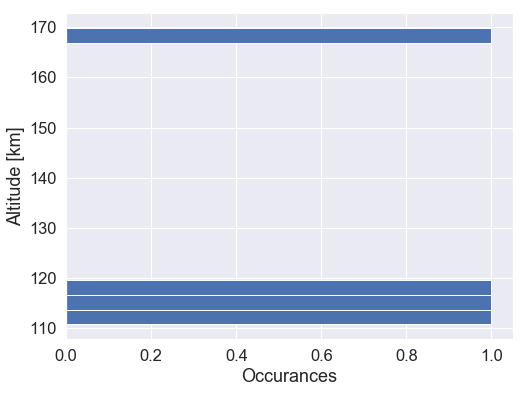

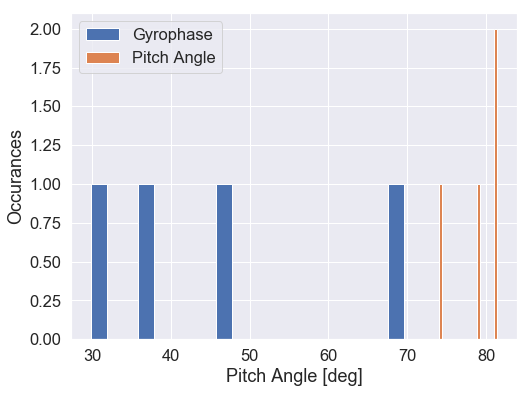

In [18]:
plt.figure(figsize=(8,6));
plt.hist(altitude, bins=20, orientation='horizontal', density=False);
plt.ylabel('Altitude [km]');
plt.xlabel('Occurances');

plt.figure(figsize=(8,6));
plt.hist(np.abs(gyro), bins=20, label='Gyrophase')
plt.hist(np.abs(PA), bins=20, density=False, label='Pitch Angle');
plt.ylabel('Occurances');
plt.xlabel('Pitch Angle [deg]');
plt.legend();